In [107]:
# version 7

!pip install jupyter_ui_poll and pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [108]:
# imports

from IPython.display import display, Image, clear_output, HTML
import time
import random
import threading
import ipywidgets as widgets
from IPython.display import display
from jupyter_ui_poll import ui_events
import pandas as pd

import requests
from bs4 import BeautifulSoup
import json

In [109]:
# importing images

# importing blank image
blank_image = Image("blank_image.png", width = 400)

# importing (4:3) images
image4_3_diff4_b_16_12 = Image("image4_3_diff4_b_16_12.png", width = 400)
image4_3_diff4_y_12_16 = Image("image4_3_diff4_y_12_16.png", width = 400)
image4_3_diff5_b_20_15 = Image("image4_3_diff5_b_20_15.png", width = 400)
image4_3_diff5_y_15_20 = Image("image4_3_diff5_y_15_20.png", width = 400)

# importing (7:6) images
image7_6_diff2_y_12_14 = Image("image7_6_diff2_y_12_14.png", width = 400)
image7_6_diff2_b_14_12 = Image("image7_6_diff2_b_14_12.png", width = 400)
image7_6_diff3_b_21_18 = Image("image7_6_diff3_b_21_18.png", width = 400)
image7_6_diff3_y_18_21 = Image("image7_6_diff3_y_18_21.png", width = 400)

# importing (9:8) images
image9_8_diff2_b_18_16 = Image("image9_8_diff2_b_18_16.png", width = 400)
image9_8_diff2_y_16_18 = Image("image9_8_diff2_y_16_18.png", width = 400)
image9_8_diff2_b_18_16_copy = Image("image9_8_diff2_b_18_16.png", width = 400)
image9_8_diff2_y_16_18_copy = Image("image9_8_diff2_y_16_18.png", width = 400)

# importing (10:9) images
image10_9_diff1_b_10_9 = Image("image10_9_diff1_b_10_9.png", width = 400)
image10_9_diff1_y_9_10 = Image("image10_9_diff1_y_9_10.png", width = 400)
image10_9_diff2_b_20_18 = Image("image10_9_diff2_b_20_18.png", width = 400)
image10_9_diff2_y_18_20 = Image("image10_9_diff2_y_18_20.png", width = 400)

# images not shuffled.
# ordered such that one image from each ratio set is presented before the cycle repeats
# order of ratios: (4:3 > 7:6 > 9:8 > 10:9). each images is repeated twice in the list.
image_list = [image4_3_diff4_b_16_12, image7_6_diff2_y_12_14, image9_8_diff2_b_18_16, image10_9_diff1_b_10_9,
              image4_3_diff4_y_12_16, image7_6_diff2_b_14_12, image9_8_diff2_y_16_18, image10_9_diff1_y_9_10,
              image4_3_diff5_b_20_15, image7_6_diff3_b_21_18, image9_8_diff2_b_18_16_copy, image10_9_diff2_b_20_18,
              image4_3_diff5_y_15_20, image7_6_diff3_y_18_21, image9_8_diff2_y_16_18_copy, image10_9_diff2_y_18_20,
              image4_3_diff4_b_16_12, image7_6_diff2_y_12_14, image9_8_diff2_b_18_16, image10_9_diff1_b_10_9,
              image4_3_diff4_y_12_16, image7_6_diff2_b_14_12, image9_8_diff2_y_16_18, image10_9_diff1_y_9_10,
              image4_3_diff5_b_20_15, image7_6_diff3_b_21_18, image9_8_diff2_b_18_16_copy, image10_9_diff2_b_20_18,
              image4_3_diff5_y_15_20, image7_6_diff3_y_18_21, image9_8_diff2_y_16_18_copy, image10_9_diff2_y_18_20]

filelist = ["image4_3_diff4_b_16_12.png", "image7_6_diff2_y_12_14.png", "image9_8_diff2_b_18_16.png", "image10_9_diff1_b_10_9.png",
            "image4_3_diff4_y_12_16.png", "image7_6_diff2_b_14_12.png", "image9_8_diff2_y_16_18.png", "image10_9_diff1_y_9_10.png",
            "image4_3_diff5_b_20_15.png", "image7_6_diff3_b_21_18.png", "image9_8_diff2_b_18_16.png", "image10_9_diff2_b_20_18.png",
            "image4_3_diff5_y_15_20.png", "image7_6_diff3_y_18_21.png", "image9_8_diff2_y_16_18.png", "image10_9_diff2_y_18_20.png",
            "image4_3_diff4_b_16_12.png", "image7_6_diff2_y_12_14.png", "image9_8_diff2_b_18_16.png", "image10_9_diff1_b_10_9.png",
            "image4_3_diff4_y_12_16.png", "image7_6_diff2_b_14_12.png", "image9_8_diff2_y_16_18.png", "image10_9_diff1_y_9_10.png",
            "image4_3_diff5_b_20_15.png", "image7_6_diff3_b_21_18.png", "image9_8_diff2_b_18_16.png", "image10_9_diff2_b_20_18.png",
            "image4_3_diff5_y_15_20.png", "image7_6_diff3_y_18_21.png", "image9_8_diff2_y_16_18.png", "image10_9_diff2_y_18_20.png"]

In [110]:
# data to collect
# Defined outside the function scope as global variables

event_info = {
    'type': '',
    'description': '',
    'time': -1
}

# variable that go into the json files
response_times = []
image_used = []
ratio_set = []
dot_difference = []
results = []

collected_data = {
    'username': [],
    'age': [],
    'sex': [],
    'ANS_history': [],
    'set1_score': [],
    'set2_score': [],
    'set1_total_time_taken': [],
    'set2_total_time_taken': [],
    'set1_json': [],
    'set2_json': []
}

mydataframe = pd.DataFrame(collected_data)

In [111]:
# defining functions

def wait_for_event(timeout=-1, interval=0.001, max_rate=20, allow_interupt=True):    
    start_wait = time.time()

    event_info['type'] = "x"
    
    event_info['description'] = ""
    event_info['time'] = -1

    n_proc = int(max_rate*interval)+1
    
    with ui_events() as ui_poll:
        keep_looping = True
        while keep_looping==True:
            # process UI events
            ui_poll(n_proc)

            # end loop if we have waited more than the timeout period
            if (timeout != -1) and (time.time() > start_wait + timeout):
                keep_looping = False
                
            # end loop if event has occured
            if allow_interupt==True and event_info['description']!="":
                keep_looping = False
                
            # add pause before looping
            # to check events again
            time.sleep(interval)
    
    # return event description after wait ends
    # will be set to empty string '' if no event occured
    return event_info

# this function lets buttons 
# register events when clicked
def register_btn_event(btn):
    event_info['type'] = "button click"
    event_info['description'] = btn.description
    event_info['time'] = time.time()
    return

def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok

In [112]:
# defining ANS functions - Set 1

def ANS_test_set1():

# initialising variables
    global set1_score, set1_total_time_taken
    set1_score = 0
    set1_total_time_taken = 0
    
# start of Set 1
    for i in range(32):

        image = image_list[i]
    
        display(image)
        time.sleep(0.75)
        clear_output(wait=True)
        display(blank_image)
        start_time = time.time()
    
        btn1 = widgets.Button(description="Blue")
        btn2 = widgets.Button(description="Yellow")
        
        btn1.on_click(register_btn_event)
        btn2.on_click(register_btn_event)
        panel = widgets.HBox([btn1, btn2])
        
        display(panel)
        
        result = wait_for_event(timeout=3)

# collecting data from Set 1
        
        if result['description'] == 'Blue':
            answer = 'b'
            if 'b' in filelist[i]:
                print("Correct!")
                result = "Correct"
                set1_score = set1_score + 1
            else:
                print("Wrong")
                result = "Wrong"
            results.append(result)
        
        elif result['description'] == 'Yellow':
            answer = 'y'
            if 'y' in filelist[i]:
                print("Correct!")
                result = "Correct"
                set1_score = set1_score + 1
            else:
                print("Wrong")
                result = "Wrong"
            results.append(result)
                
        elif result['description'] == '':
            print("No button was pressed. Answer within 3 seconds.")
            result = "NA"
            set1_score = set1_score + 0
            results.append(result)
        
        end_time = time.time()
        
        time_taken = end_time - start_time
        response_times.append(time_taken) 
        image_used.append(filelist[i])

        file_name = filelist[i]

        if 'image4_3' in file_name:
            ratio = "4:3"
        elif 'image7_6' in filelist[i]:
            ratio = "7:6"
        elif 'image9_8' in filelist[i]:
            ratio = '9:8'
        elif 'image10_9' in filelist[i]:
            ratio = '10:9'
        ratio_set.append(ratio)

        
        if 'diff1' in file_name:
            dot_diff = 1
        elif 'diff2' in filelist[i]:
            dot_diff = 2
        elif 'diff3' in filelist[i]:
            dot_diff = 3
        elif 'diff4' in filelist[i]:
            dot_diff = 4
        elif 'diff5' in filelist[i]:
            dot_diff = 5
        dot_difference.append(dot_diff)
        
        time.sleep(1)
        
        print(f"You took {time_taken:.2f} seconds")
        print(f"Score: {set1_score}")
    
        set1_total_time_taken += time_taken
        set1_total_time_taken = round(set1_total_time_taken, 2)
    
        time.sleep(1.5)
        clear_output(wait=True)


    print("This is the end of Set 1.")
    print(f"""
    Your Total Score in Set 1 is {set1_score} out of 32, 
    and Total Time Taken to respond is {set1_total_time_taken} seconds.
    """)
    time.sleep(6)
    clear_output()    
    
    global set1_df
    set1_df = pd.DataFrame({'response_times': response_times,
                        'image_used': image_used,
                        'ratio': ratio_set,
                        'dot_difference': dot_difference,
                        'results': results})

    return set1_df

In [113]:
# defining ANS functions - Set 2

def ANS_test_set2():
    
# initialising variables
    global set2_score, set2_total_time_taken
    set2_score = 0
    set2_total_time_taken = 0   
    
# start of set 2
    for i in range(32):

        image = image_list[i]
    
        display(image)
        time.sleep(1.5)
        clear_output(wait=True)
        display(blank_image)
        start_time = time.time()
    
        # adding buttons
        btn1 = widgets.Button(description="Blue")
        btn2 = widgets.Button(description="Yellow")
        
        btn1.on_click(register_btn_event)
        btn2.on_click(register_btn_event)
        panel = widgets.HBox([btn1, btn2])
        
        display(panel)
        
        result = wait_for_event(timeout=3)

# collecting data from set 2
        
        if result['description'] == 'Blue':
            answer = 'b'
            if 'b' in filelist[i]:
                print("Correct!")
                result = "Correct"
                set2_score = set2_score + 1
            else:
                print("Wrong")
                result = "Wrong"
            results.append(result)
        
        elif result['description'] == 'Yellow':
            answer = 'y'
            if 'y' in filelist[i]:
                print("Correct!")
                result = "Correct"
                set2_score = set2_score + 1
            else:
                print("Wrong")
                result = "Wrong"
            results.append(result)
                
        elif result['description'] == '':
            print("No button was pressed. Answer within 3 seconds.")
            result = "NA"
            set2_score = set2_score + 0
            results.append(result)
        
        end_time = time.time()
        
        time_taken = end_time - start_time
        response_times.append(time_taken) 
        image_used.append(filelist[i])

        file_name = filelist[i]

        if 'image4_3' in file_name:
            ratio = "4:3"
        elif 'image7_6' in filelist[i]:
            ratio = "7:6"
        elif 'image9_8' in filelist[i]:
            ratio = '9:8'
        elif 'image10_9' in filelist[i]:
            ratio = '10:9'
        ratio_set.append(ratio)

        
        if 'diff1' in file_name:
            dot_diff = 1
        elif 'diff2' in filelist[i]:
            dot_diff = 2
        elif 'diff3' in filelist[i]:
            dot_diff = 3
        elif 'diff4' in filelist[i]:
            dot_diff = 4
        elif 'diff5' in filelist[i]:
            dot_diff = 5
        dot_difference.append(dot_diff)
        
        time.sleep(1)
        
        print(f"You took {time_taken:.2f} seconds")
        print(f"Score: {set2_score}")
    
        set2_total_time_taken += time_taken
        set2_total_time_taken = round(set2_total_time_taken)
    
        time.sleep(1.5)
        clear_output(wait=True)

    print("This is the end of Set 2 and the entire ANS test.")
    print(f"""
    Your Total Score in Set 2 is {set2_score} out of 32,
    and Total Time Taken to respond is {set2_total_time_taken} seconds.
    """)
    time.sleep(6)
    clear_output() 

    global set2_df
    set2_df = pd.DataFrame({'response_times': response_times,
                        'image_used': image_used,
                        'ratio': ratio_set,
                        'dot_difference': dot_difference,
                        'results': results})
    return set2_df

In [114]:
def full_ANS_test():
    global mydataframe

# intro

    data_consent_info = """DATA CONSENT INFORMATION:

    Please read:
    We wish to record your response data
    to an anonymised public data repository.
    Your data will be used for educational teaching purposes,
    practising data analysis and visualisation.
    Please type 'yes' (in non-cappitcal letters) in the box below if you consent to the upload.
    If you do not consent, this programme will be terminated."""
    
    print(data_consent_info)
    
    result = input("> ")
    
    if result == "yes":
        print("""
        Thanks for your participation.
        Please contact philip.lewis@ucl.ac.uk
        if you have any questions or concerns regarding the stored results.
        """)
    
    else:
        print("The programme is terminating")
        time.sleep(2)
        raise(Exception("User did not consent to continue test."))
    
    # introduction
    time.sleep(5)
    clear_output()
    print("Welcome to the Approximate Number System (ANS) test.")
    time.sleep(1)
    print("Before taking the test, please answer the following questions.")
    time.sleep(2)

    username = input('Enter an anonymous username.')
    clear_output()
    age = input('How old are you? Please enter the numeral.')
    clear_output()
    sex = input('What is your biological sex? Enter f for female or m for male.')
    clear_output()
    ANS_history = input('Have you ever taken an ANS test before?')
    clear_output()

    print("Thank you for answering the questions.") 
    print("The ANS test will begin soon and take approximately 5-7 minutes.")
    time.sleep(2)
    print(""" 
    INSTRUCTIONS
    
    When presented with an image containing 2 arrays of circles 
    - a blue array and a yellow array, choose the array which you 
    think contains more circles by clicking the corresponding button.

    After being presented with an image,
    you will have 3 seconds to make a choice.
    """)
    time.sleep(5)
    input('Are you ready to start the ANS test? Type "yes" to continue.')
    clear_output()

    print("Set 1 will begin prompty.")
    time.sleep(3)
    clear_output()

# set 1
    
    ANS_test_set1()

    print("Set 2 will begin prompty.")
    time.sleep(3)
    clear_output()
    
# set 2
    
    ANS_test_set2()

    time.sleep(1)
    
    print("PERFORMANCE SUMMARY")
    print(f"""
    Set 1:
    Accuracy = {(set1_score/32)*100} %
    Average Response Time = {round(((set1_total_time_taken)/32),2)} s

    Set 2: 
    Accuracy = {(set2_score/32)*100} %
    Average Response Time = {round(((set2_total_time_taken)/32),2)} s
    """)

    print("Thank you for participating!")
    
# storing user information and df of collected data in json format
    
    newdata = {
        'username': [username],
        'age': [age],
        'sex': [sex],
        'ANS_history': [ANS_history],
        'set1_score': [set1_score],
        'set2_score': [set2_score],
        'set1_total_time_taken': [set1_total_time_taken],
        'set2_total_time_taken': [set2_total_time_taken],
        'set1_json': set1_df.to_json(),
        'set2_json': set1_df.to_json()        
        }

    newdataframe = pd.DataFrame(newdata)
    mydataframe = pd.concat([mydataframe, newdataframe],
                            axis='rows',
                            ignore_index=True)


    form_url = 'https://docs.google.com/forms/d/e/1FAIpQLSeUWJjgIY0r1bST4wCwQH6KMbe-AWZSZrLuP56wMwvA4cZ-eA/viewform?usp=sf_link'
    send_to_google_form(newdata, form_url)
    return

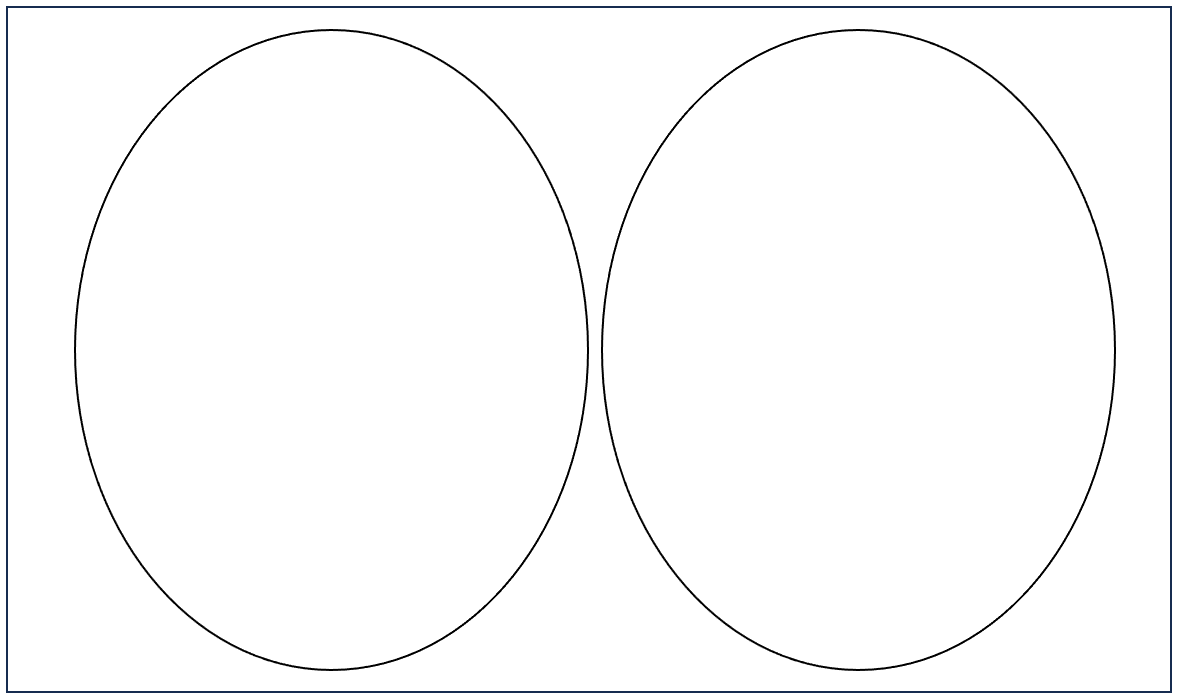

In [ ]:
full_ANS_test()